# 📊 Dataset Information

**Note:** The dataset for this project is **not included in this repository** to keep the repository lightweight.  

You can download the dataset from **Kaggle** using the link below:  

[Download The Daily Water Intake Dataset](https://www.kaggle.com/datasets/prince7489/viral-shorts-and-reels-performance-analytics-dataset/data)  

Please make sure to place the downloaded CSV file in the same directory as this notebook before running any code.

# Importing

## Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

/kaggle/input/daily-water-intake-and-hydration-patterns-dataset/Daily_Water_Intake.csv


## Import CSV And convert to DataFrame

In [2]:
df = pd.read_csv('Daily_Water_Intake.csv')

# Preprocessing

## Frist five row

In [3]:
df.head()

,Age,Gender,Weight (kg),Daily Water Intake (liters),Physical Activity Level,Weather,Hydration Level
0,56,Male,96,4.23,Moderate,Hot,Good
1,60,Male,105,3.95,High,Normal,Good
2,36,Male,68,2.39,Moderate,Cold,Good
3,19,Female,74,3.13,Moderate,Hot,Good
4,38,Male,77,2.11,Low,Normal,Poor


## last Five row

In [4]:
df.tail()

,Age,Gender,Weight (kg),Daily Water Intake (liters),Physical Activity Level,Weather,Hydration Level
29995,47,Male,97,3.45,Moderate,Cold,Good
29996,49,Female,109,5.32,High,Hot,Good
29997,56,Female,54,1.50,Moderate,Cold,Poor
29998,36,Male,106,4.00,Low,Hot,Good
29999,26,Female,98,4.43,Moderate,Hot,Good


## Shape of our dataset

In [5]:
df.shape

(30000, 7)

## List out all columns

In [6]:
df.columns

Index(['Age', 'Gender', 'Weight (kg)', 'Daily Water Intake (liters)',
       'Physical Activity Level', 'Weather', 'Hydration Level'],
      dtype='object')

## Datatype of each columns

In [7]:
df.dtypes

Age                              int64
Gender                          object
Weight (kg)                      int64
Daily Water Intake (liters)    float64
Physical Activity Level         object
Weather                         object
Hydration Level                 object
dtype: object

## Information of all Columns

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          30000 non-null  int64  
 1   Gender                       30000 non-null  object 
 2   Weight (kg)                  30000 non-null  int64  
 3   Daily Water Intake (liters)  30000 non-null  float64
 4   Physical Activity Level      30000 non-null  object 
 5   Weather                      30000 non-null  object 
 6   Hydration Level              30000 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 1.6+ MB


## Check Null Value

In [9]:
df.isnull().sum()

Age                            0
Gender                         0
Weight (kg)                    0
Daily Water Intake (liters)    0
Physical Activity Level        0
Weather                        0
Hydration Level                0
dtype: int64

## Check Dupicate Value

In [10]:
df.duplicated().sum()

np.int64(338)

## Remove Duplicate Data

In [11]:
df.drop_duplicates(inplace=True)

## Summary

In [12]:
df.describe()

,Age,Weight (kg),Daily Water Intake (liters)
count,29662.000000,29662.000000,29662.000000
mean,43.408199,77.065471,2.864480
std,14.990058,18.677993,0.829543
min,18.000000,45.000000,1.500000
25%,30.000000,61.000000,2.230000
50%,43.000000,77.000000,2.840000
75%,56.000000,93.000000,3.450000
max,69.000000,109.000000,5.430000


# EDA

In [13]:
def show_fig():
    plt.tight_layout()
    plt.show()

plot_no = 1

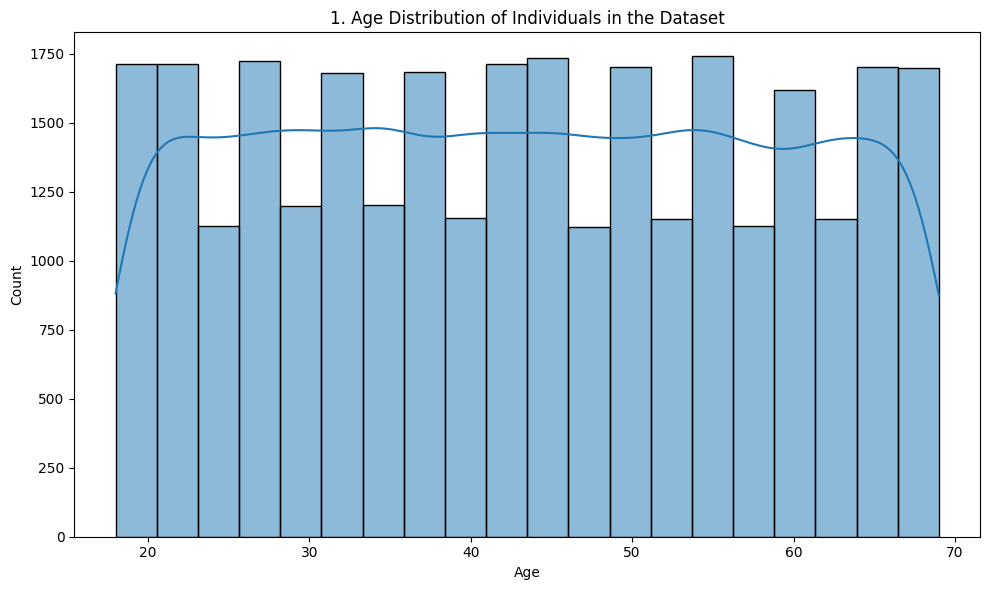

In [14]:
fig = plt.figure(figsize=(10,6))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title(f'{plot_no}. Age Distribution of Individuals in the Dataset')
show_fig()
plot_no += 1


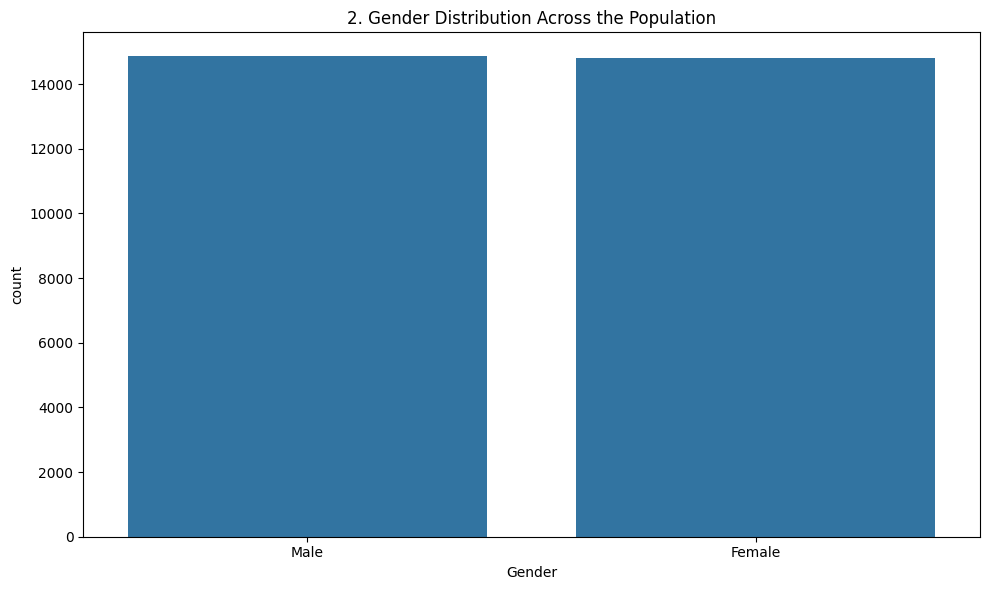

In [15]:
fig = plt.figure(figsize=(10,6))
sns.countplot(x='Gender', data=df)
plt.title(f'{plot_no}. Gender Distribution Across the Population')
show_fig()
plot_no += 1


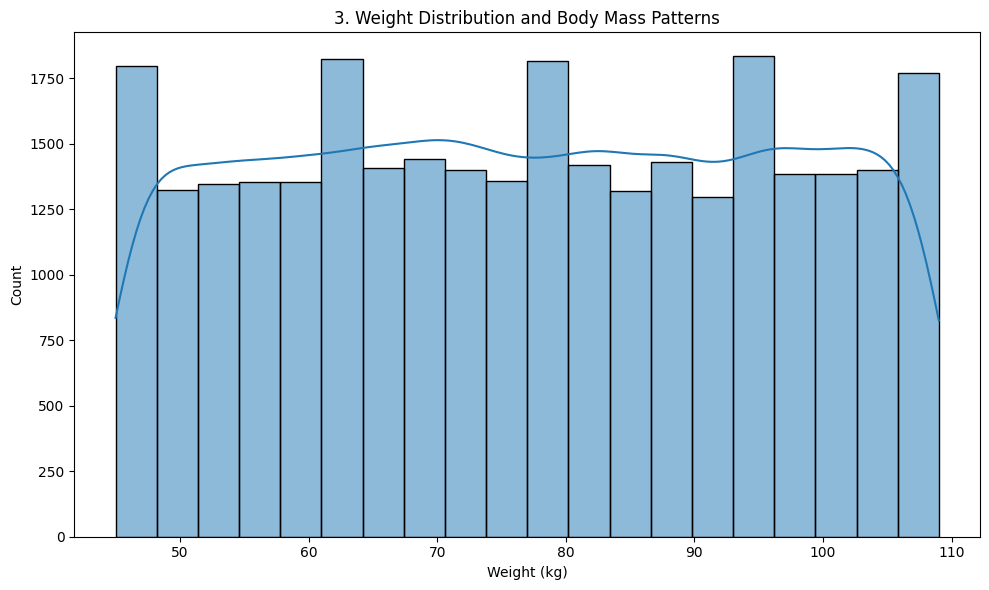

In [16]:
fig = plt.figure(figsize=(10,6))
sns.histplot(df['Weight (kg)'], bins=20, kde=True)
plt.title(f'{plot_no}. Weight Distribution and Body Mass Patterns')
show_fig()
plot_no += 1


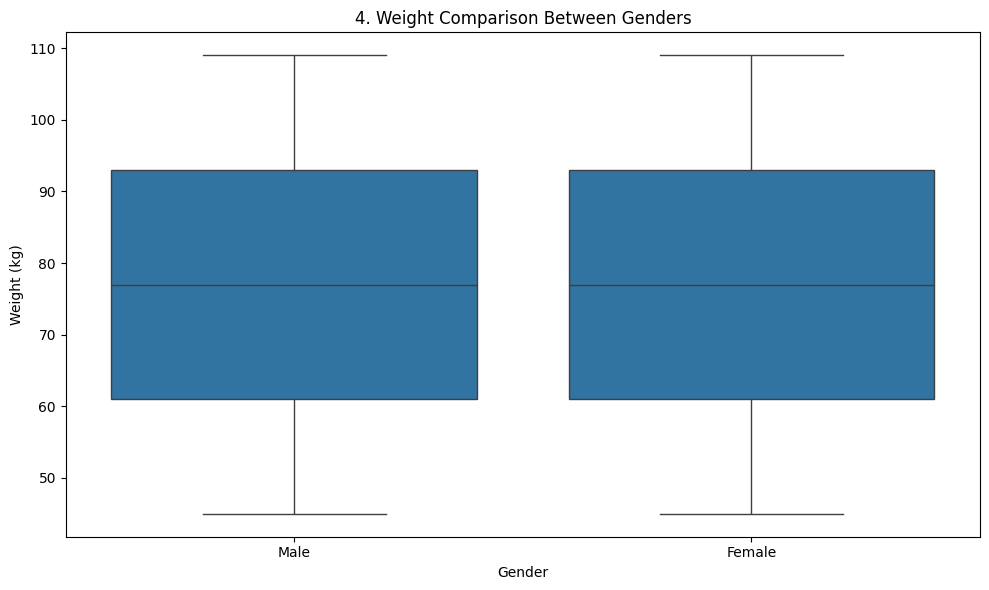

In [17]:
fig = plt.figure(figsize=(10,6))
sns.boxplot(x='Gender', y='Weight (kg)', data=df)
plt.title(f'{plot_no}. Weight Comparison Between Genders')
show_fig()
plot_no += 1


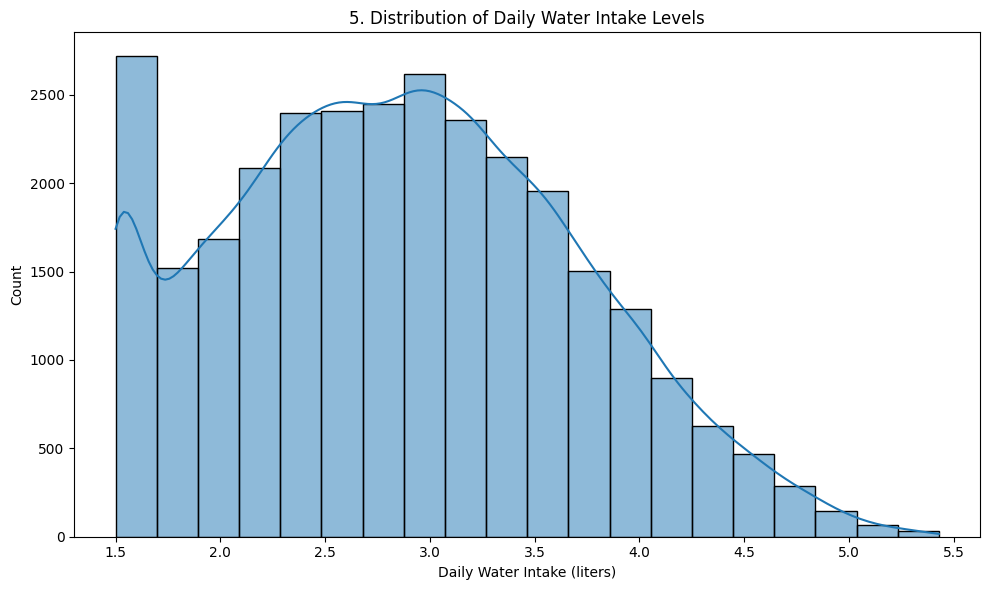

In [18]:
fig = plt.figure(figsize=(10,6))
sns.histplot(df['Daily Water Intake (liters)'], bins=20, kde=True)
plt.title(f'{plot_no}. Distribution of Daily Water Intake Levels')
show_fig()
plot_no += 1


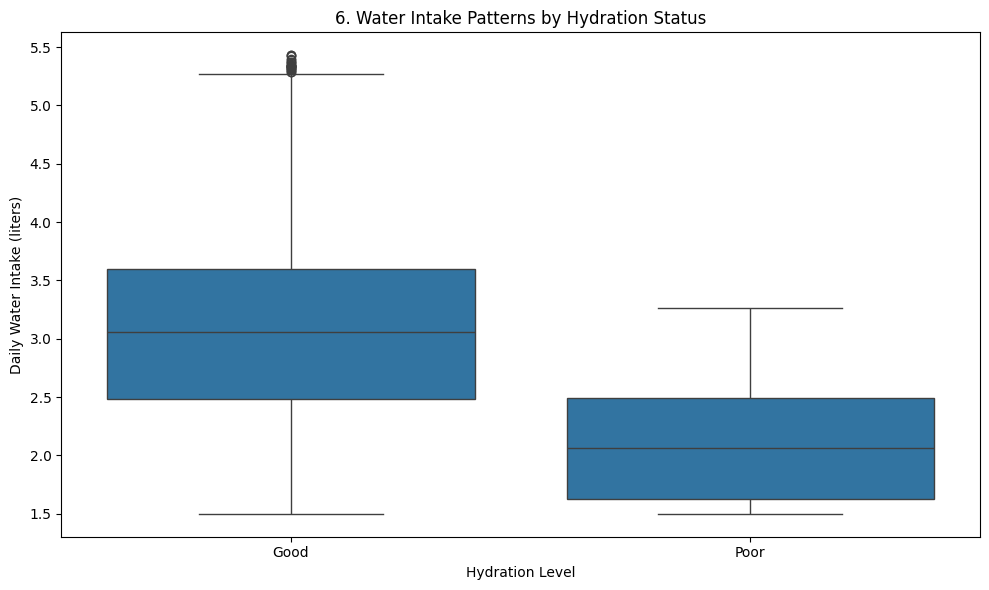

In [19]:
fig = plt.figure(figsize=(10,6))
sns.boxplot(x='Hydration Level', y='Daily Water Intake (liters)', data=df)
plt.title(f'{plot_no}. Water Intake Patterns by Hydration Status')
show_fig()
plot_no += 1


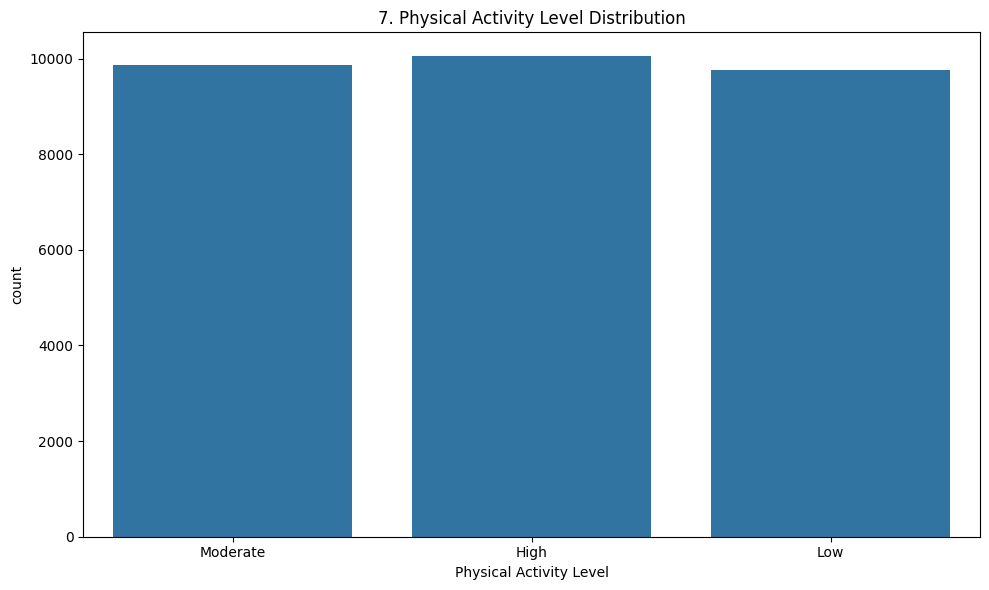

In [20]:
fig = plt.figure(figsize=(10,6))
sns.countplot(x='Physical Activity Level', data=df)
plt.title(f'{plot_no}. Physical Activity Level Distribution')
show_fig()
plot_no += 1


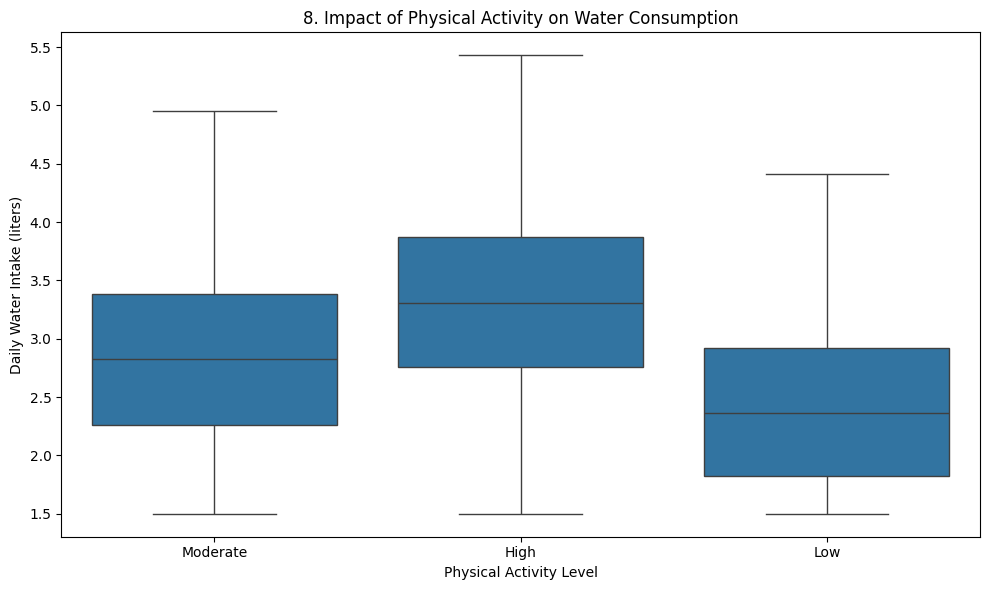

In [21]:
fig = plt.figure(figsize=(10,6))
sns.boxplot(x='Physical Activity Level', y='Daily Water Intake (liters)', data=df)
plt.title(f'{plot_no}. Impact of Physical Activity on Water Consumption')
show_fig()
plot_no += 1


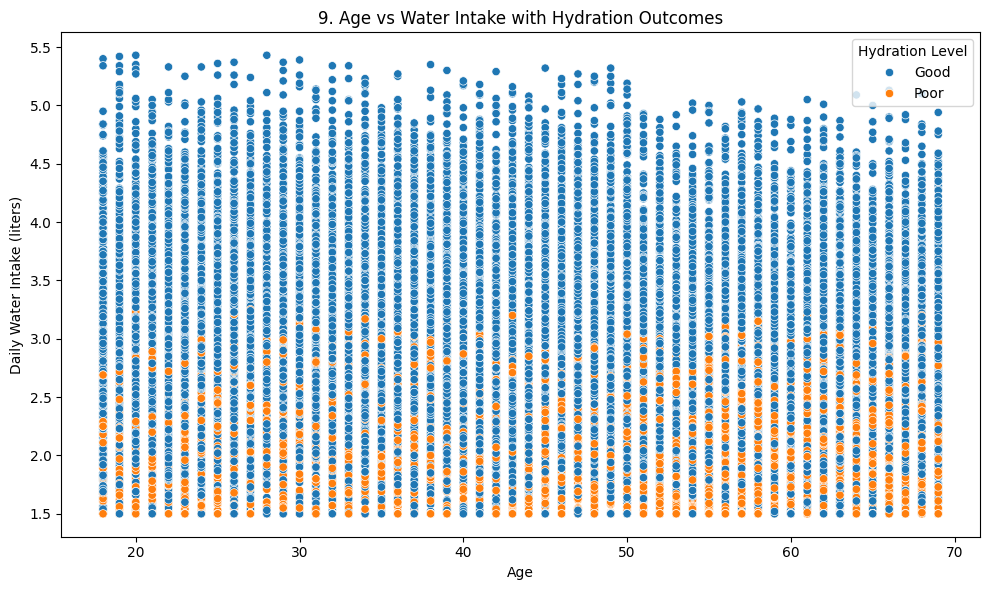

In [22]:
fig = plt.figure(figsize=(10,6))
sns.scatterplot(x='Age', y='Daily Water Intake (liters)', hue='Hydration Level', data=df)
plt.title(f'{plot_no}. Age vs Water Intake with Hydration Outcomes')
show_fig()
plot_no += 1


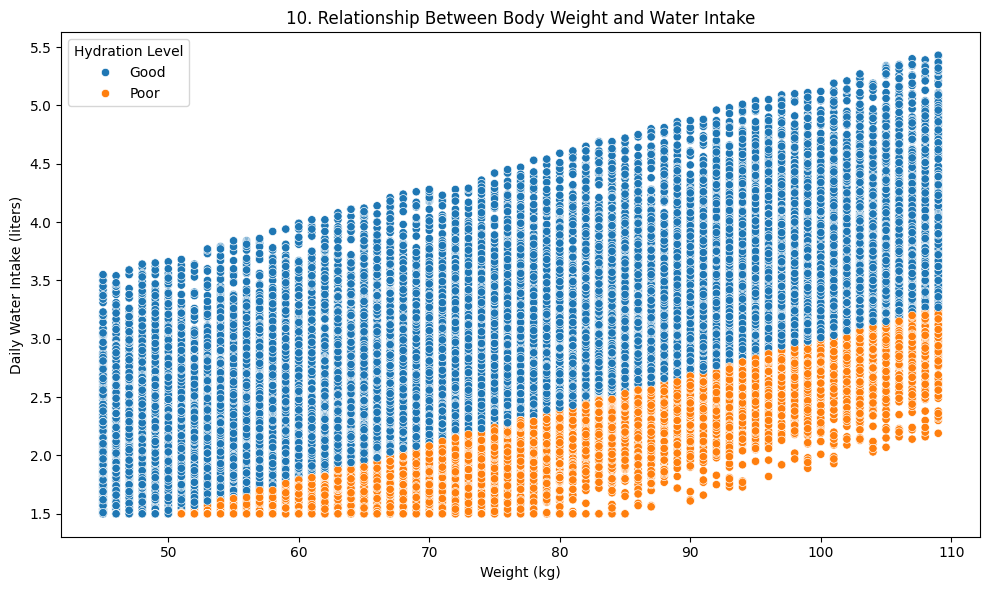

In [23]:
fig = plt.figure(figsize=(10,6))
sns.scatterplot(x='Weight (kg)', y='Daily Water Intake (liters)', hue='Hydration Level', data=df)
plt.title(f'{plot_no}. Relationship Between Body Weight and Water Intake')
show_fig()
plot_no += 1


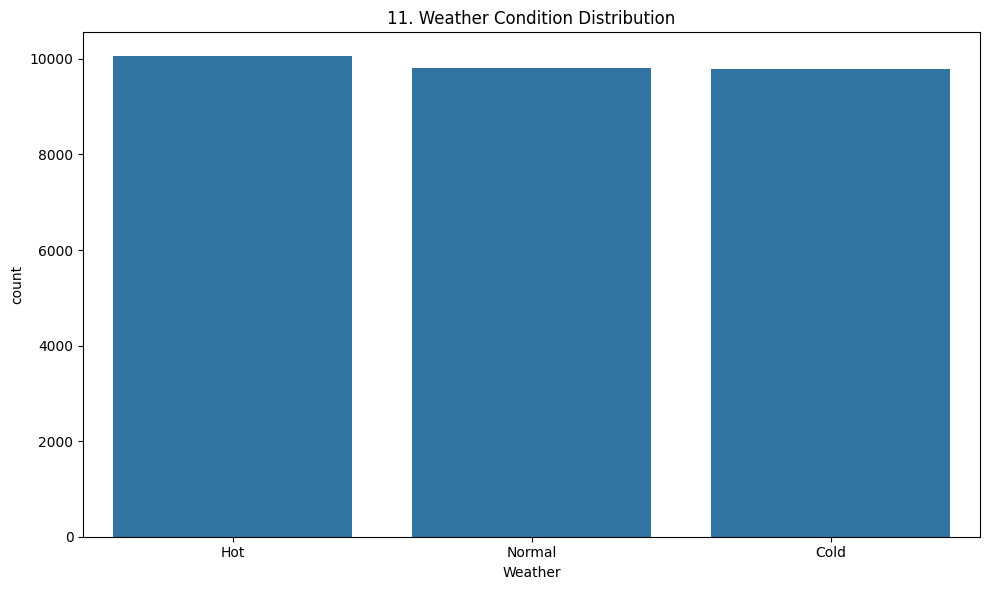

In [24]:
fig = plt.figure(figsize=(10,6))
sns.countplot(x='Weather', data=df)
plt.title(f'{plot_no}. Weather Condition Distribution')
show_fig()
plot_no += 1


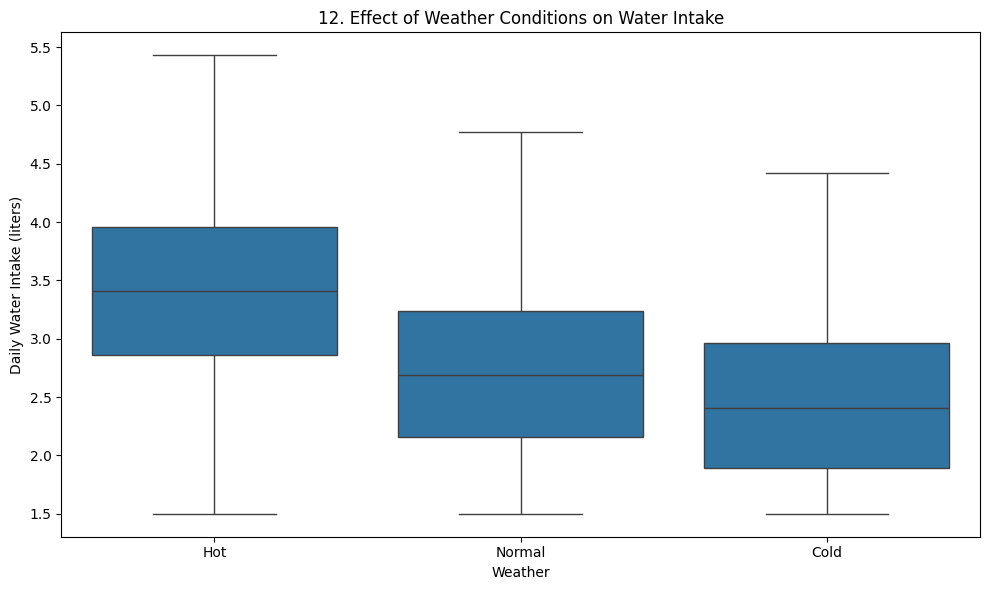

In [25]:
fig = plt.figure(figsize=(10,6))
sns.boxplot(x='Weather', y='Daily Water Intake (liters)', data=df)
plt.title(f'{plot_no}. Effect of Weather Conditions on Water Intake')
show_fig()
plot_no += 1


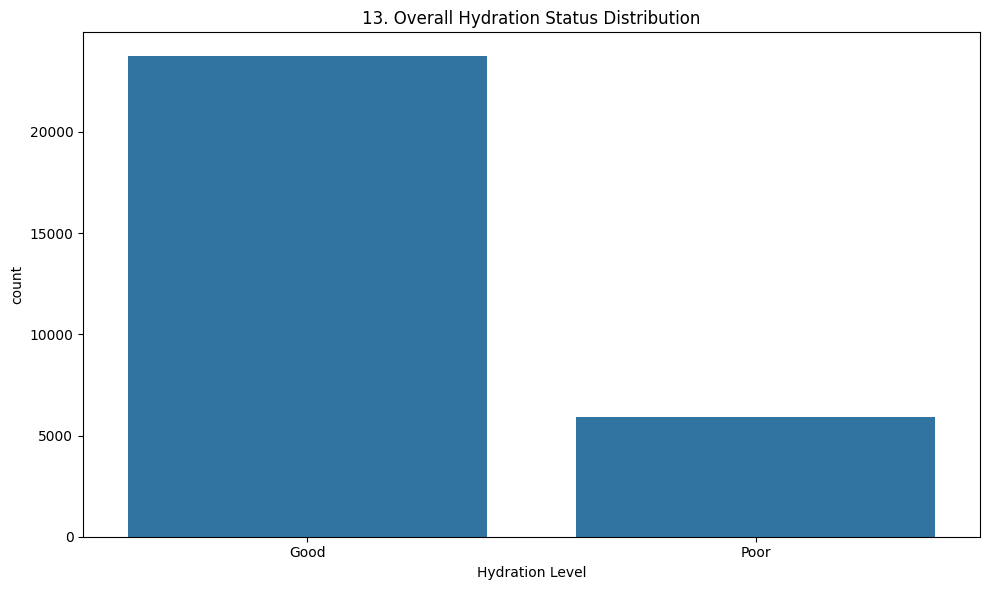

In [26]:
fig = plt.figure(figsize=(10,6))
sns.countplot(x='Hydration Level', data=df)
plt.title(f'{plot_no}. Overall Hydration Status Distribution')
show_fig()
plot_no += 1


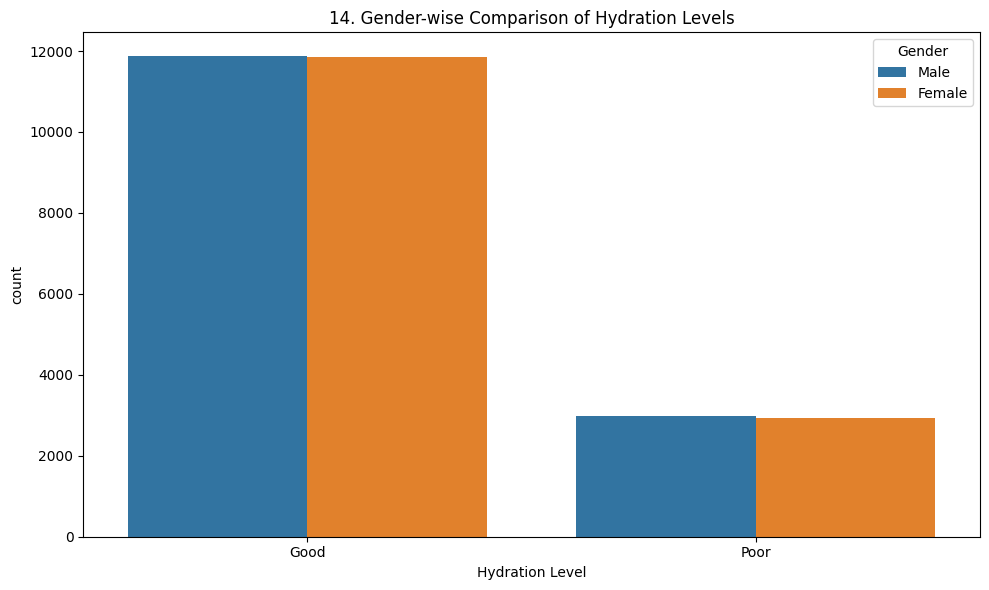

In [27]:
fig = plt.figure(figsize=(10,6))
sns.countplot(x='Hydration Level', hue='Gender', data=df)
plt.title(f'{plot_no}. Gender-wise Comparison of Hydration Levels')
show_fig()
plot_no += 1


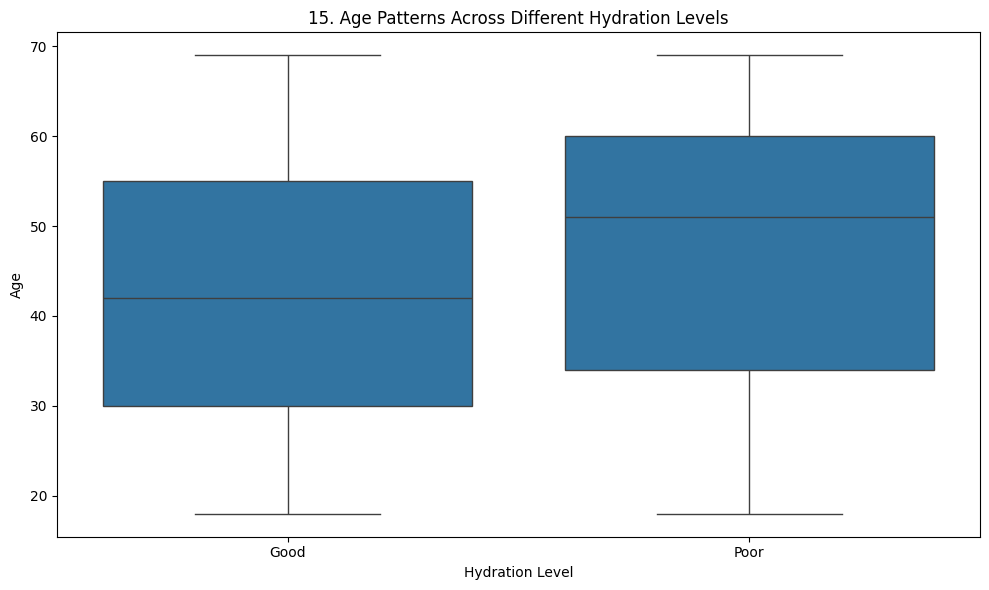

In [28]:
fig = plt.figure(figsize=(10,6))
sns.boxplot(x='Hydration Level', y='Age', data=df)
plt.title(f'{plot_no}. Age Patterns Across Different Hydration Levels')
show_fig()
plot_no += 1


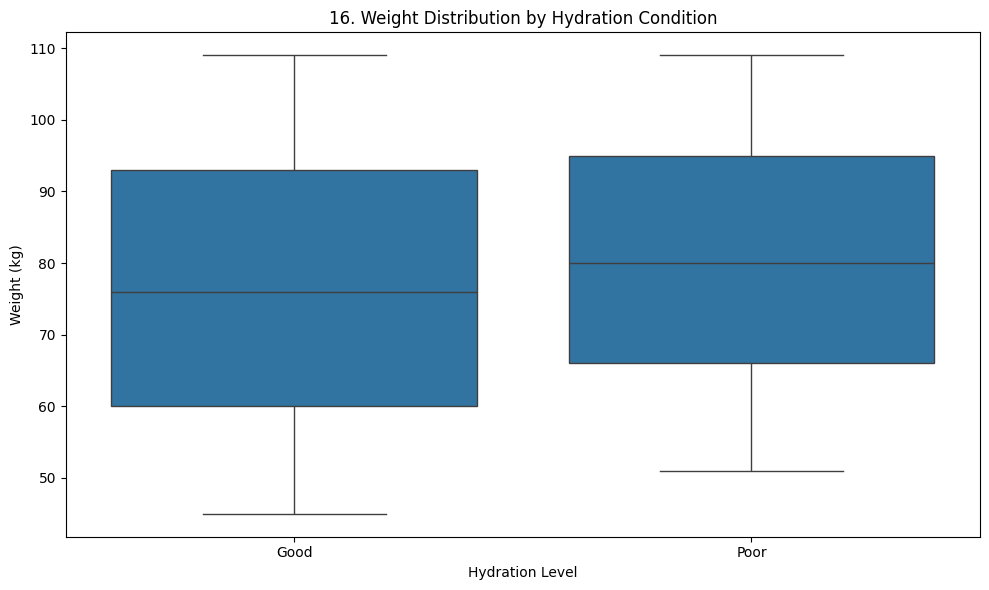

In [29]:
fig = plt.figure(figsize=(10,6))
sns.boxplot(x='Hydration Level', y='Weight (kg)', data=df)
plt.title(f'{plot_no}. Weight Distribution by Hydration Condition')
show_fig()
plot_no += 1


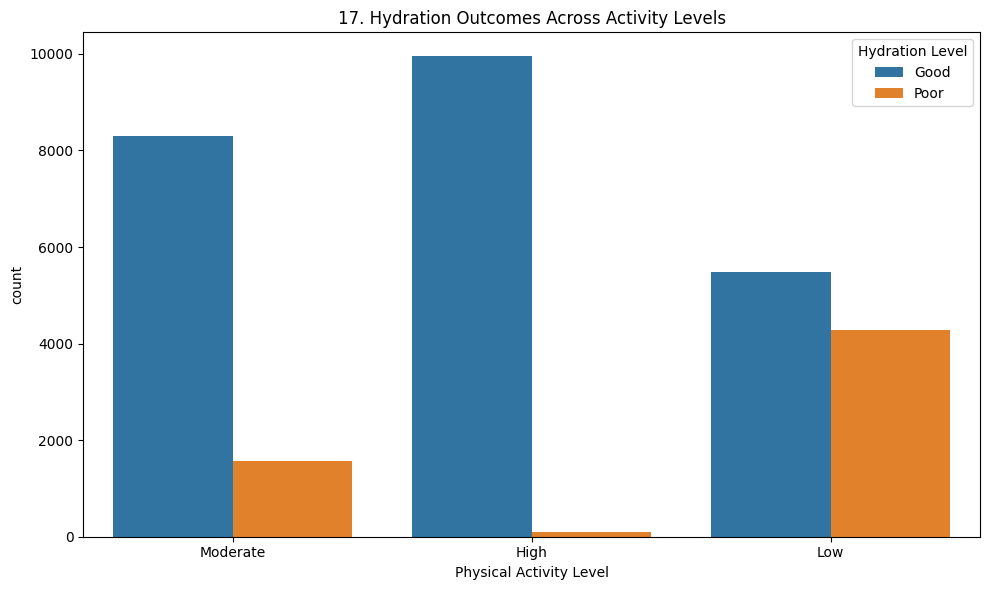

In [30]:
fig = plt.figure(figsize=(10,6))
sns.countplot(x='Physical Activity Level', hue='Hydration Level', data=df)
plt.title(f'{plot_no}. Hydration Outcomes Across Activity Levels')
show_fig()
plot_no += 1


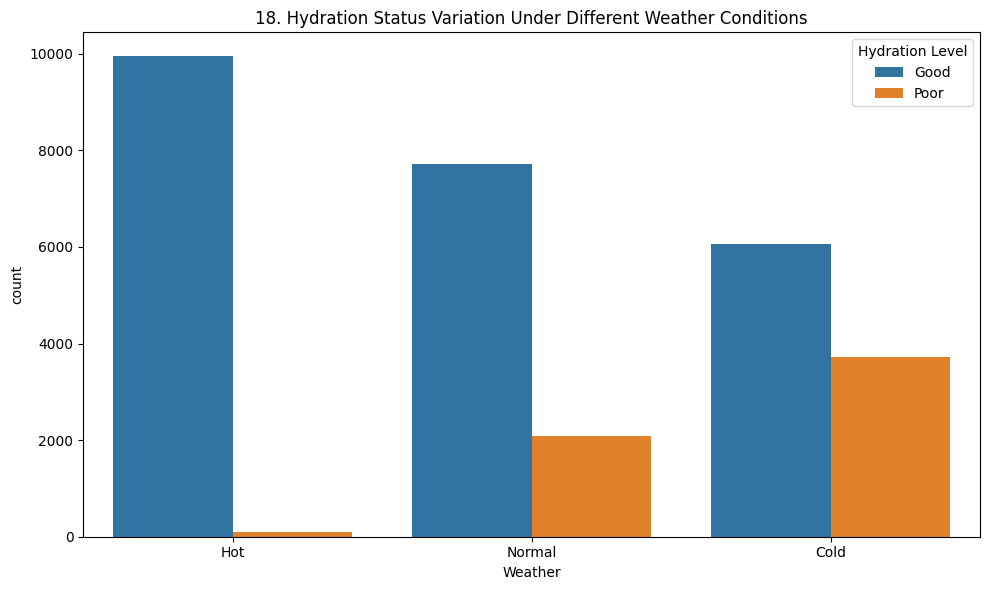

In [31]:
fig = plt.figure(figsize=(10,6))
sns.countplot(x='Weather', hue='Hydration Level', data=df)
plt.title(f'{plot_no}. Hydration Status Variation Under Different Weather Conditions')
show_fig()
plot_no += 1


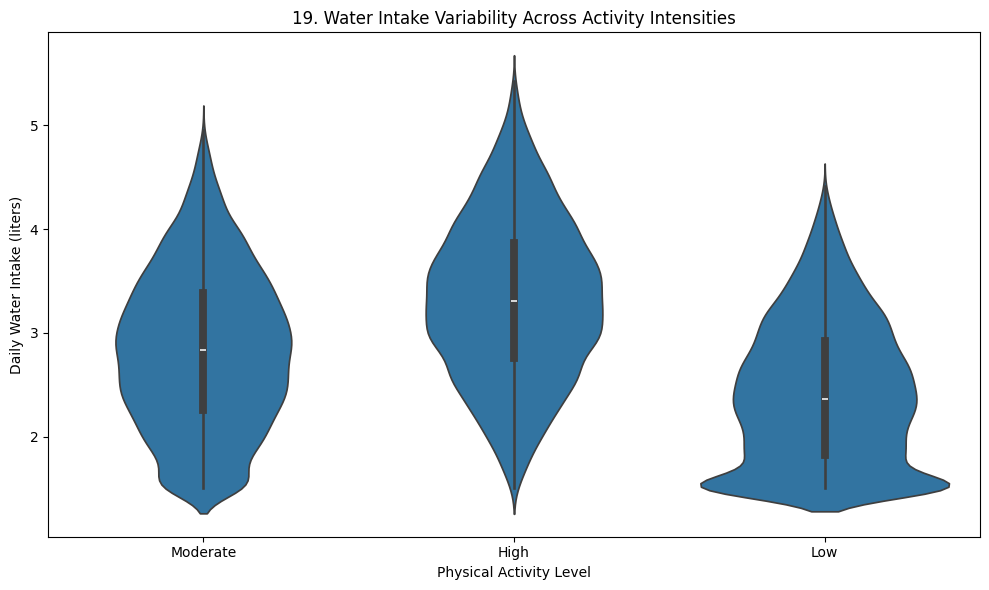

In [32]:
fig = plt.figure(figsize=(10,6))
sns.violinplot(x='Physical Activity Level', y='Daily Water Intake (liters)', data=df)
plt.title(f'{plot_no}. Water Intake Variability Across Activity Intensities')
show_fig()
plot_no += 1


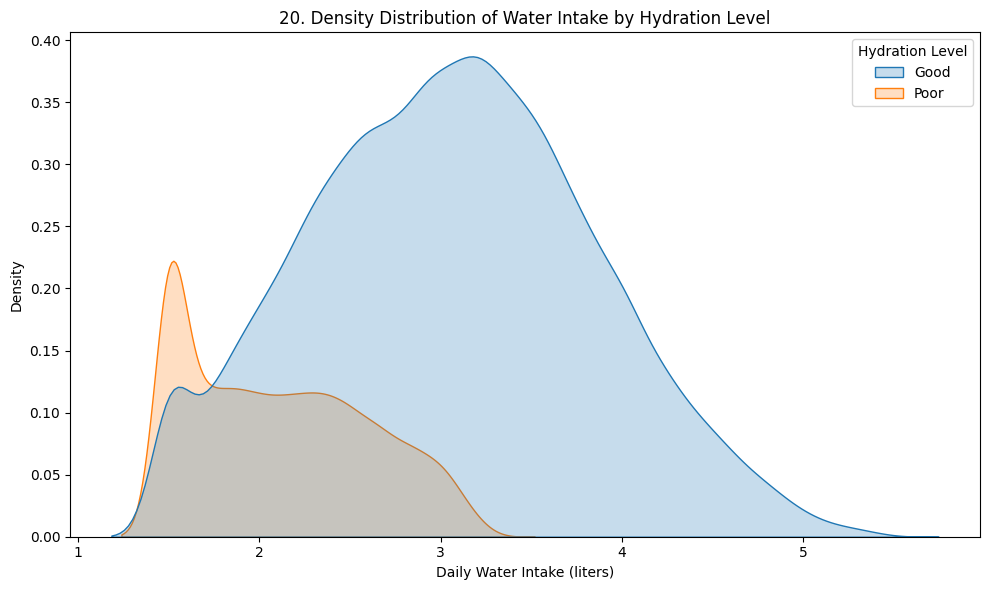

In [33]:
fig = plt.figure(figsize=(10,6))
sns.kdeplot(data=df, x='Daily Water Intake (liters)', hue='Hydration Level', fill=True)
plt.title(f'{plot_no}. Density Distribution of Water Intake by Hydration Level')
show_fig()
plot_no += 1


# Model Training

## Separate features and target

In [34]:
X = df.drop('Hydration Level', axis=1)
y = df['Hydration Level']

## Encode categorical variables

In [35]:
X_encoded = pd.get_dummies(X, drop_first=True)

## Train-test split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y
)

## Feature scaling

In [37]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Logistic Regression model

In [38]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_log = log_model.predict(X_test_scaled)

# Evaluation
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

Logistic Regression Accuracy: 0.9966290241024777
              precision    recall  f1-score   support

        Good       1.00      1.00      1.00      4746
        Poor       1.00      0.98      0.99      1187

    accuracy                           1.00      5933
   macro avg       1.00      0.99      0.99      5933
weighted avg       1.00      1.00      1.00      5933



## Support Vector Classifier

In [39]:
svm_model = SVC(kernel='rbf')
svm_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_svm = svm_model.predict(X_test_scaled)

# Evaluation
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))


SVM Accuracy: 0.9871902915894152
              precision    recall  f1-score   support

        Good       0.99      1.00      0.99      4746
        Poor       0.99      0.95      0.97      1187

    accuracy                           0.99      5933
   macro avg       0.99      0.97      0.98      5933
weighted avg       0.99      0.99      0.99      5933



## KNN model

In [40]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_knn = knn_model.predict(X_test_scaled)

# Evaluation
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))


KNN Accuracy: 0.9728636440249452
              precision    recall  f1-score   support

        Good       0.98      0.99      0.98      4746
        Poor       0.94      0.92      0.93      1187

    accuracy                           0.97      5933
   macro avg       0.96      0.95      0.96      5933
weighted avg       0.97      0.97      0.97      5933



## Gradient Boosting Classifier

In [41]:
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_gb = gb_model.predict(X_test_scaled)

# Evaluation
print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))
print(classification_report(y_test, y_pred_gb))

Gradient Boosting Accuracy: 0.9914040114613181
              precision    recall  f1-score   support

        Good       0.99      1.00      0.99      4746
        Poor       0.99      0.97      0.98      1187

    accuracy                           0.99      5933
   macro avg       0.99      0.98      0.99      5933
weighted avg       0.99      0.99      0.99      5933

